<h1 style = "font-family: Comic Sans MS	"> Cleaning data </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('E:\Me\Health survey.xlsx', engine='openpyxl')

In [4]:
df.columns

Index(['Timestamp', 'ID', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
df.drop(columns='Timestamp')

,ID,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,37,Female,United States,IL,NaN,No,Yes,Often,2021-06-25 00:00:00,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,32,Male,Canada,NaN,NaN,No,No,Rarely,2021-06-25 00:00:00,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,1256,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,1257,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,1258,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [6]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [7]:
df['Gender'] = df['Gender']. replace(['M', 'male', 'm', 'Male-ish', 'maile', 'Mal', 'Make'], 'Male')
df['Gender'] = df['Gender']. replace(['female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female '], 'Female')
df['Gender'] = df['Gender']. replace(['Trans-female', 'Cis Female', 'something kinda male?', 'Male (CIS)', 'queer/she/they','Cis Male', 'non-binary', 'Nah', 'All','Enby', 'fluid','Genderqueer', 'Androgyne','Agender'], 'Other')
df['Gender'].fillna('Other', inplace=True)
df['Gender'].unique()

array(['Female', 'Male', 'Other', 'cis-female/femme', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Male ', 'Man', 'Trans woman', 'msle',
       'Neuter', 'Female (trans)', 'queer', 'Female (cis)', 'Mail',
       'cis male', 'A little about you', 'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [8]:
df['Age'].median()

31.0

In [9]:
df["Age"] = np.where(df["Age"] <0, 30,df['Age'])
df["Age"] = np.where(df["Age"] >100, 30,df['Age'])
df['Age'].fillna(30, inplace=True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [30]:
df.to_excel('Output.xlsx', sheet_name='Sheet1', index=False)

<h1 style = "font-family: Comic Sans MS	"> Exploratory Data Anlysis </h1>

The dataset is provided by **Open Sourcing Illness**, a non-profit organization dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. This survey is conducted by respondents who have mental health disorders in tech companies

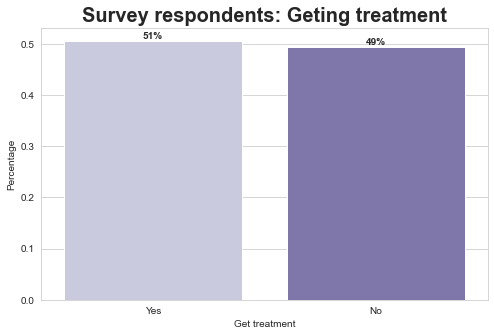

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Survey respondents: Geting treatment', fontsize=20, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('Get treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Get treatment', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')

This is the result of the response to the question: **"Have you sought treatment for a metal health condition?"**
We can see that the number of responders who seek and do not seek treatment is equal, at 50%

In [11]:
def graph(X, title):
    plt.figure(figsize = (20,6))
    orders = sorted(X.dropna().unique())

    plt.subplot(1,2,1)
    eda_percentage = X.value_counts(normalize = True).rename_axis(X.name).reset_index(name = 'Percentage')
    ax = sns.barplot(x = X.name, y = 'Percentage', data = eda_percentage, palette = 'Purples', order=orders)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')
        plt.title(title, fontsize=15, fontweight='bold')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=16)

    plt.subplot(1,2,2)
    ax = sns.countplot(X, hue = df['treatment'], palette = 'Purples', order=orders)
    plt.title(f'{title} relating to seeking treatment',  fontsize=15, fontweight='bold')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)

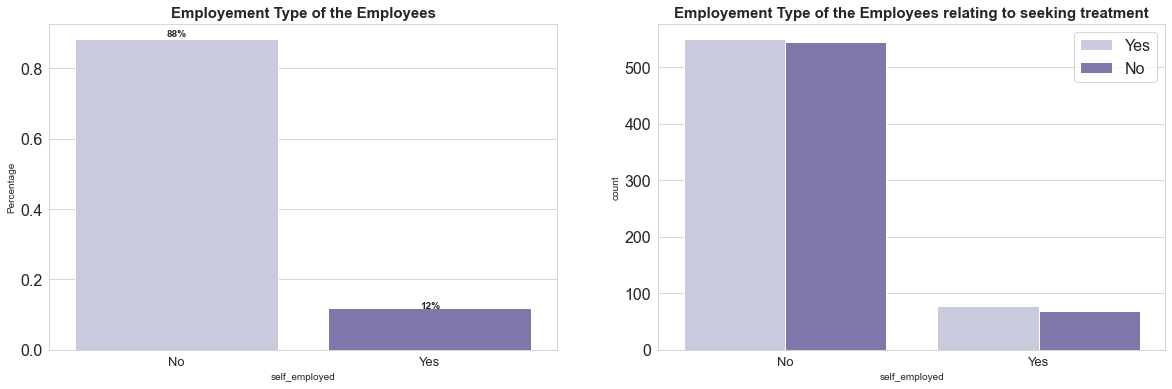

In [12]:
graph(df['self_employed'], 'Employement Type of the Employees')

This is the result of responds to question: **"Are you self-employed?"** 

We can see that the number of people who are self-employed significantly lower than employed (10% compared to 90%). However, the number of respondents seeking treatment is quite similar. Both types of employment have half of the respondents have sought treatments. 

We can conclude that type of employments does not influence whether a person seeks treatment or not. 

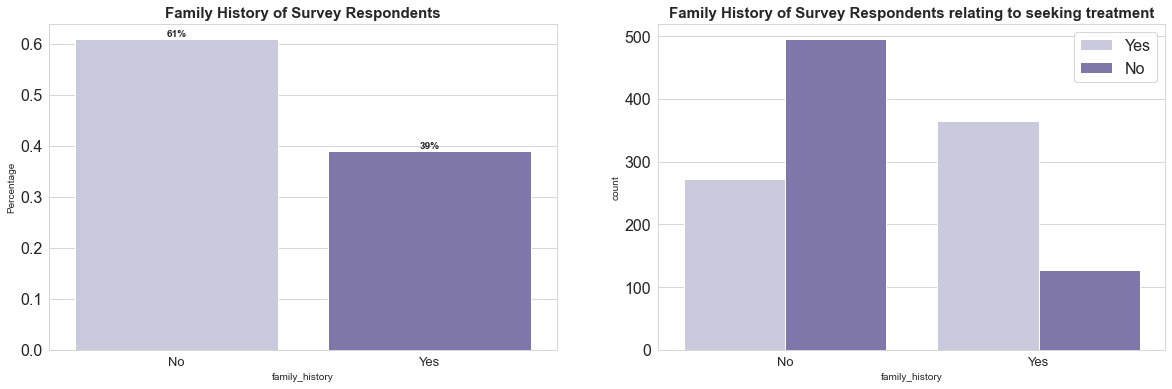

In [13]:
graph(df['family_history'], 'Family History of Survey Respondents')

This is the result of responds to question: **"Do you have a family history of mental illness?"**  

We can see that respondents who have a family history of mental illness have a much high chance of having to seek treatments. The reason can be that they are more familiar with mental health treatments and pay more attention to mental health. 

However, a family history of mental illness could be a factor leading to a high chance of having severe mental illness of respondents, due to the higher percentage of them seeking treatments. 

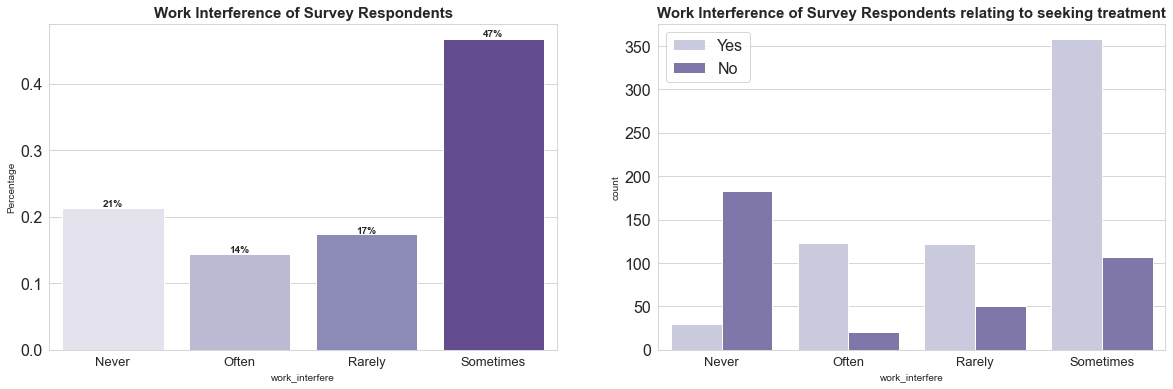

In [14]:
graph(df['work_interfere'], 'Work Interference of Survey Respondents')

This is the result of responds to question: **"If you have a mental health condition, do you feel that it interferes with your work?"**

Respondents answering Sometimes having the highest percentage of respondents seeking treatments. The same can be applied to the person answering Often. We can see from the result that usually having mental illness will have a negative effect on productivity. 

Another view is that there are still some respondents answering Never still seek treatments. That is because they might not be suitable for the job, therefore they get more stress and they seek treatments before it becomes severe. 

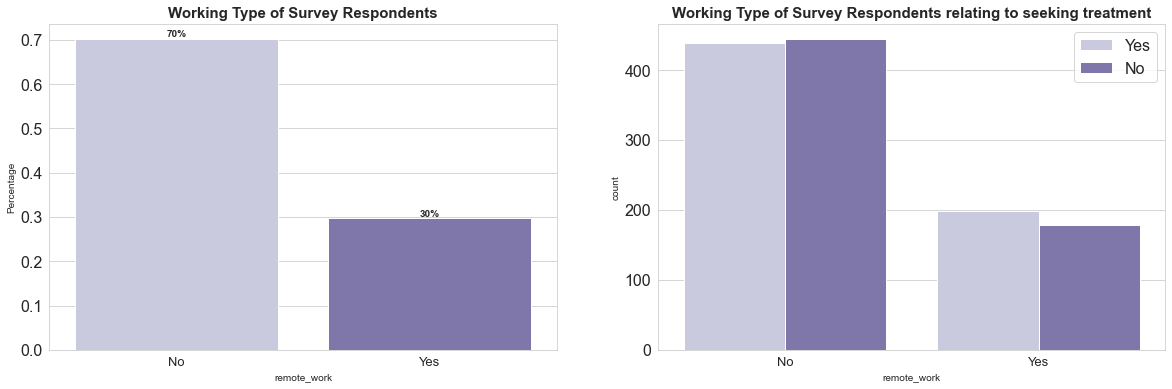

In [15]:
graph(df['remote_work'], 'Working Type of Survey Respondents')

This is the result of responds to question: **"Do you work remotely (outside of an office) at least 50% of the time?"**

Most of the respondents do not work remotely, which means that working at the office has a higher chance of getting a mental illness than working remotely. However, the number of respondents seeking treatments is similar in both categories. We can conclude that working type has a major effect on severe mental illness but has little influence on light mental illness. 

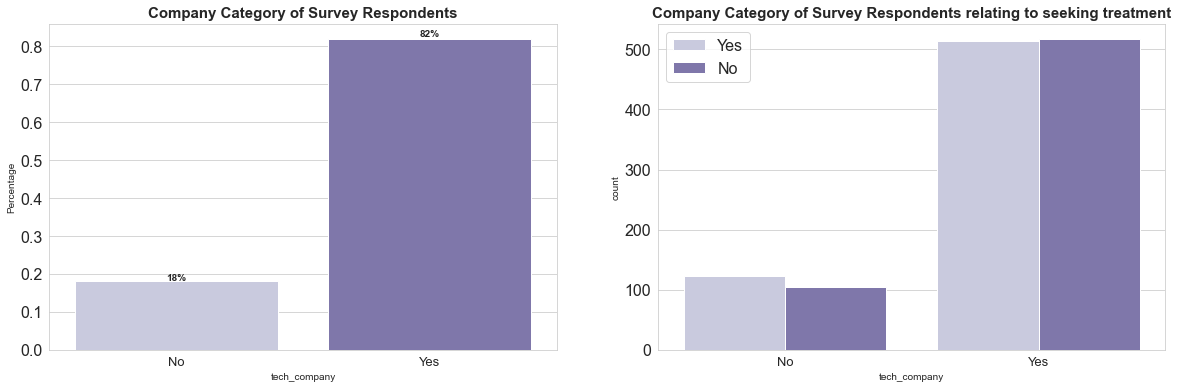

In [16]:
graph(df['tech_company'], 'Company Category of Survey Respondents')

This is the result of responds to question: **"Is your primarily a tech company/organization?"**

Although the survey was conducted in the tech industry, there are still around 18% of respondents working in a non-tech company. 

However, the number of respondents seeking mental health treatments is quite the same. There are only minor differences in numbers but are not significant. 

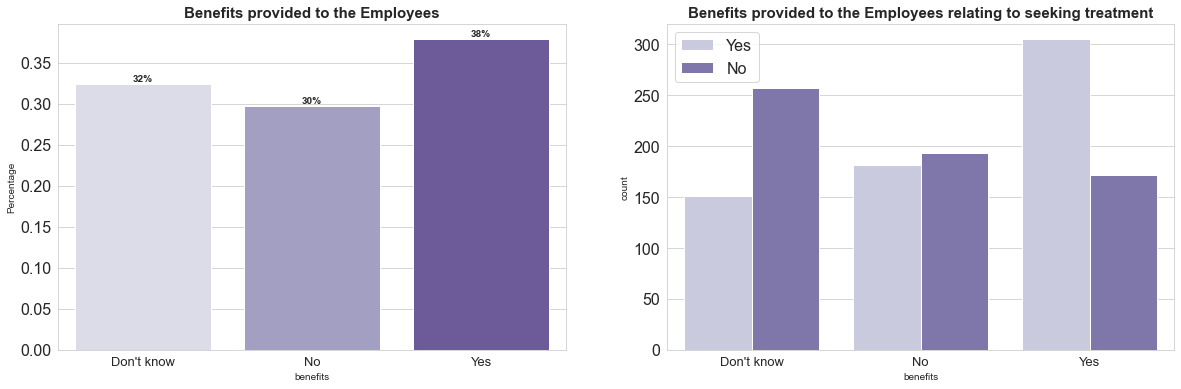

In [17]:
graph(df['benefits'], 'Benefits provided to the Employees')

This is the result of responds to question: **"Does your employer provide mental health benefits?"**

We can see that around 40% of respondents said that their employer does provide mental health benefits. There is still a high percentage (32%) who do not know whether they were provided mental health benefits. 

Surprisingly, respondents who were provided mental health treatments have the hight percent of seeking treatments. This could be explained by the fact that they will aware of the benefit of mental health treatments but companies do not provide suitable treatments. Therefore, they have to seek treatments outside. Respondents who do not know or are not provided mental health treatments at work usually have to seek treatments outside as they have a higher percentage of seeking treatments.

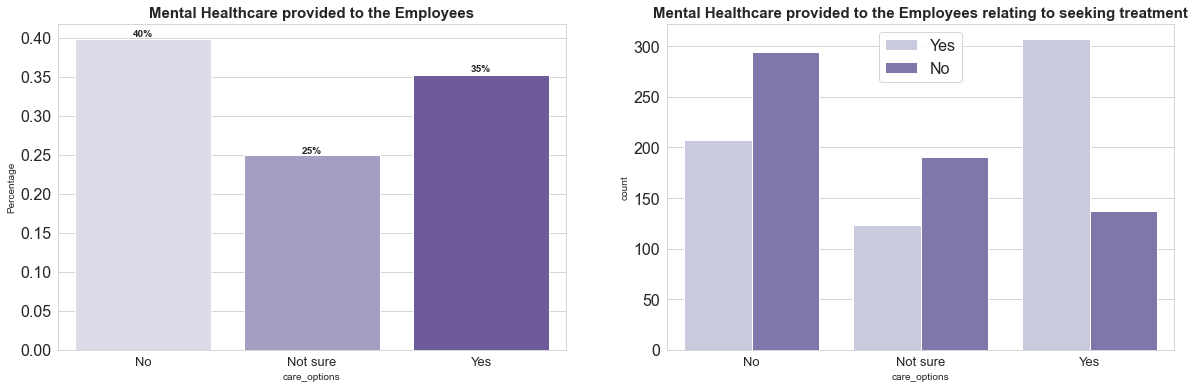

In [18]:
graph(df['care_options'], 'Mental Healthcare provided to the Employees')

This is the result of responds to question: **"DO you know the options for mental health care your employer provides?"**

Similar to the previous chart, respondents who have options about mental health care will seek treatments more and those who do not have or do not know about it will seek less. 

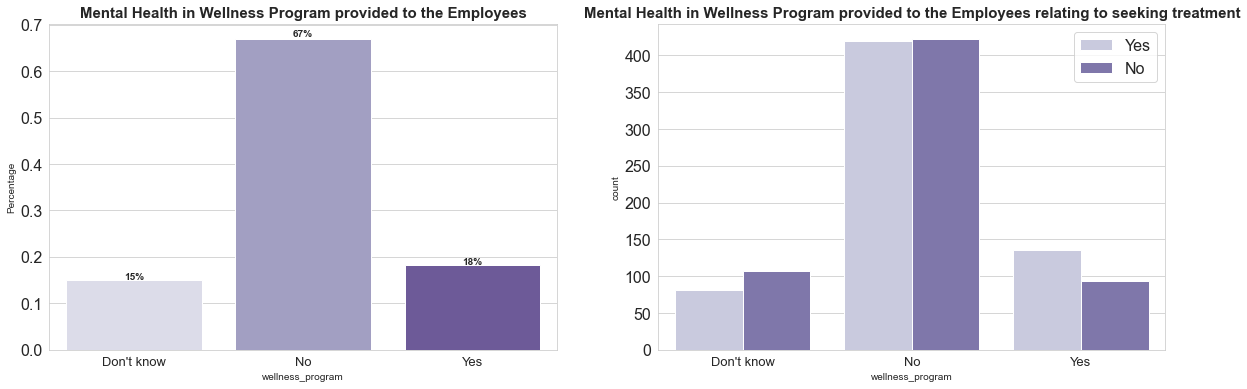

In [19]:
graph(df['wellness_program'], 'Mental Health in Wellness Program provided to the Employees')

This is the result of responds to question: **"Has your employer ever discussed mental health as part of an employee wellness program?"**

Similar to the two previous charts, respondents who are aware of mental health will likely seek treatments more from outside. However, there are a significant number of respondents do not have a wellness program including mental health and half of them are seeking treatments. That means the company must realize the harmfulness of the lack of mental health care and should provide it soon. 

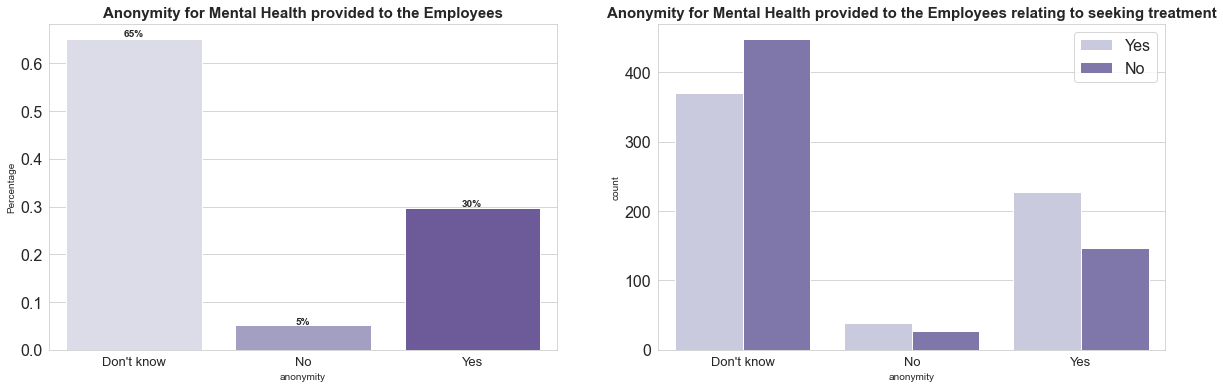

In [20]:
graph(df['anonymity'], 'Anonymity for Mental Health provided to the Employees')

This is the result of responds to question: **"Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?"**

Around 67% of the people were not aware whether anonymity was provided to them and 28% said yes to the provision of anonymity by the company. We can see the positive sign which is more companies have provided anonymity to their employee in talking about mental health problems. However, there is still a large percentage of respondents who do not know about the provision of anonymity. Employees might hide mental health problems from their work because of the social stigma attached to mental health. Therefore, they do not know whether the companies provide anonymity. 

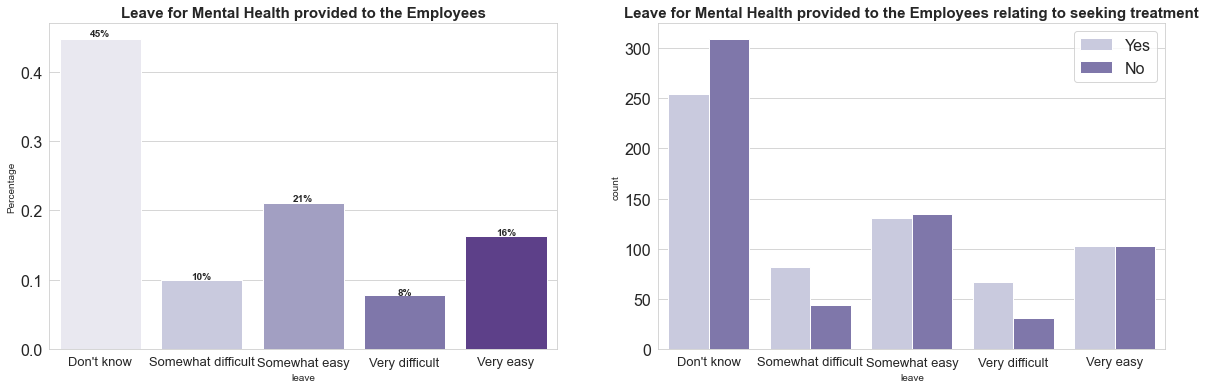

In [21]:
graph(df['leave'], 'Leave for Mental Health provided to the Employees')

This is the result of responds to question: **"How easy is it for you to take medical leave for a mental health condition?"**

A large number of respondents (47%) do not know about it. This is understandable because taking a break because of mental health is still an uncommon thing. 

For respondents who answer 'Somewhat difficult' or 'Very difficult', the majority of them have to seek treatments while for those who answer 'Somewhat easy' or 'Very easy', the number of them seek treatment is fewer but the gap is not significant. 

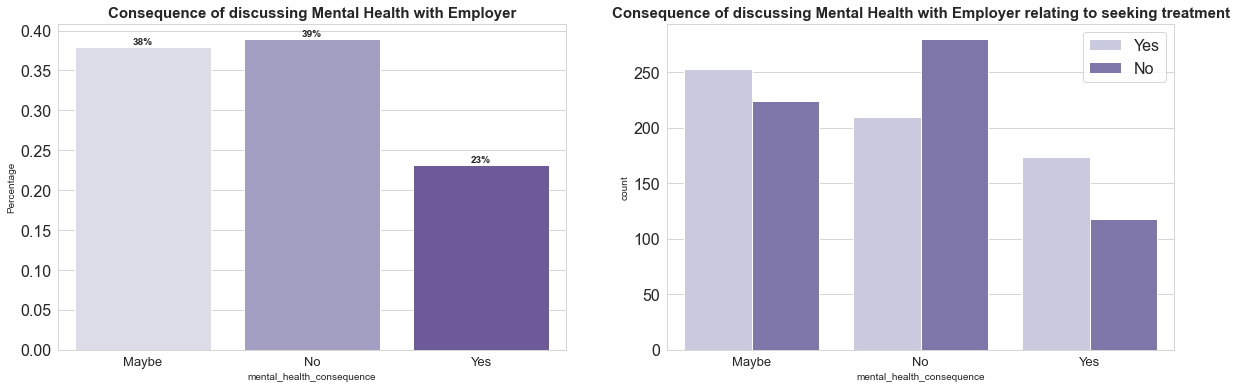

In [22]:
graph(df['mental_health_consequence'], 'Consequence of discussing Mental Health with Employer')

This is the result of responds to question: **"Do you think that discussing a mental health issue with your employer would have negative consequences?"**

Around the same number of people (around 40% ) answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer and about 22% said Yes to it.

The respondents who answer 'No' have the least percentage of seeking treatment while in two other categories, the percentage is higher than 50%. It could be concluded that discussing mental health with others can benefit their mental health overall. 

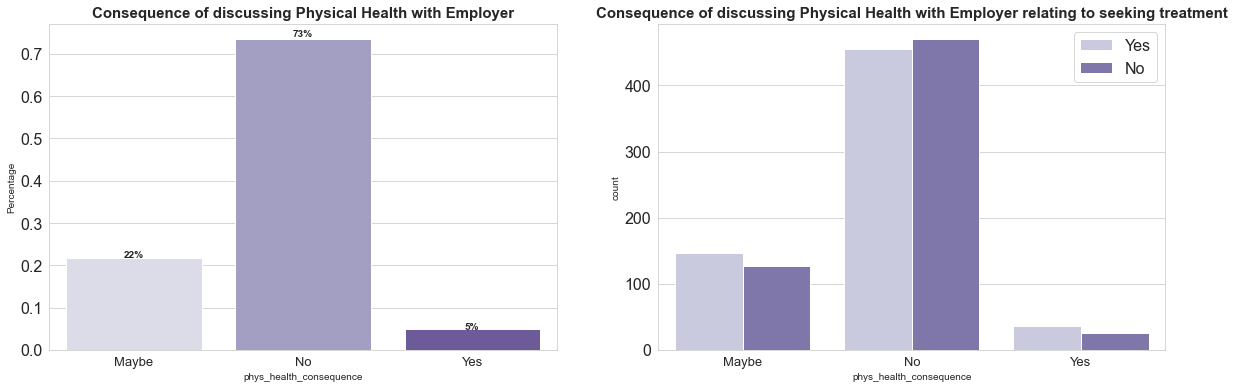

In [23]:
graph(df['phys_health_consequence'], 'Consequence of discussing Physical Health with Employer')

This is the result of responds to question: **"Do you think that discussing a physical health issue with your employer would have negative consequences?"**

The key takeaway is that there are major differences when respondents discuss mental health and physical health. 76% of respondents believe that discussing physical health with their employer will not lead to any consequence and only 4% think it will. We can see that talking about mental health is still much harder than talking about physical health. 

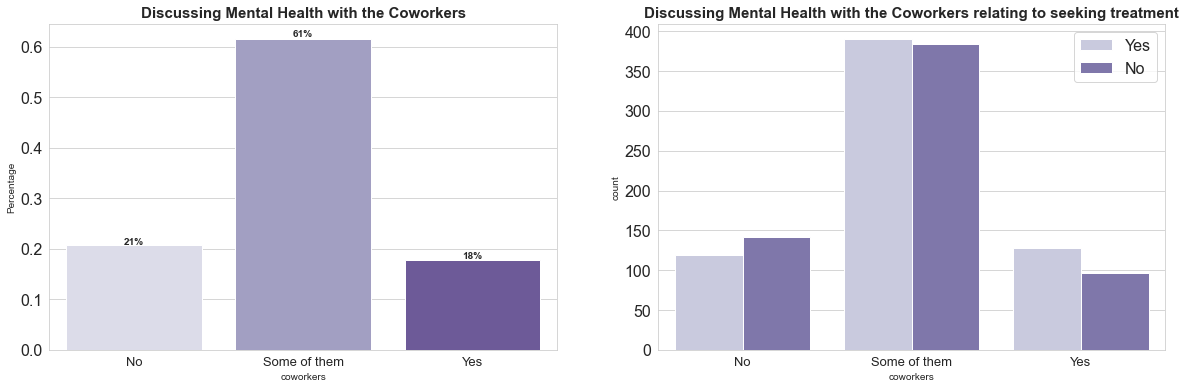

In [24]:
graph(df['coworkers'], 'Discussing Mental Health with the Coworkers')

This is the result of responds to question: **"Would you be willing to discuss a mental health issue with your coworkers?"**

Around 61% of respondents said that they are comfortable discussing their mental health with some of their coworkers, maybe they are their friends. And out of them, around 50% are seeking treatments. 

Only 20% of respondents believe that discussing mental health with a coworker is not suitable. 

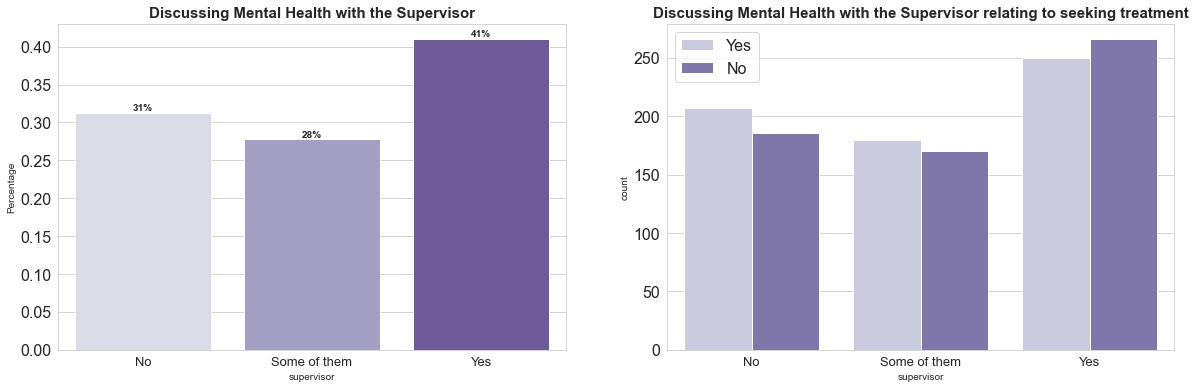

In [25]:
graph(df['supervisor'], 'Discussing Mental Health with the Supervisor')

This is the result of responds to question: **"Would you be willing to discuss a mental health issue with your supervisor(s)?"**

Differ from the previous chart, around 40% of respondents were willing to discuss mental health issues with their direct supervisor(s). This may be because they want to explain the performance. 

The percentage of respondents seeking treatment in all three categories is similar to the previous chart.

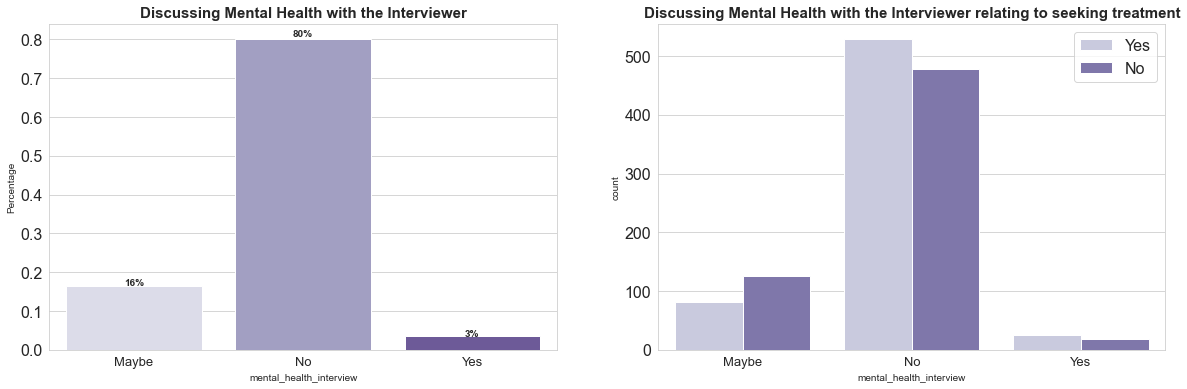

In [26]:
graph(df['mental_health_interview'], 'Discussing Mental Health with the Interviewer')

This is the result of responds to question: **"Do you think that discussing a mental health issue with your employer would have negative consequences?"**

Around 80% of respondents were willing to discuss mental health with the employer in the interview, which is a quite positive number. That indicates that there are a lot of people willing to discuss mental health before they get into the job. 

While around 15% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option to discuss it

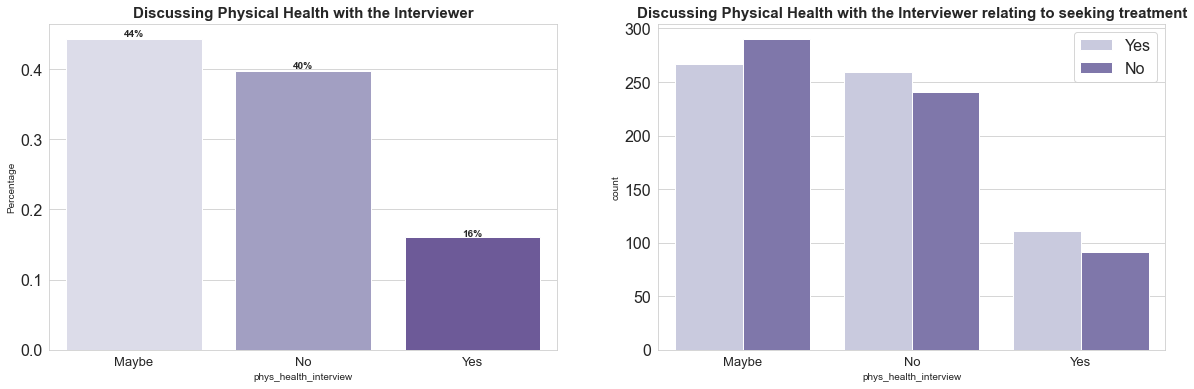

In [27]:
graph(df['phys_health_interview'], 'Discussing Physical Health with the Interviewer')

This is the result of responds to question: **"Would you bring up a physical health issue with a potential employer in an interview?"**

While a majority of the people are still confused about discussing their physical health condition with the future employer, however, close to 17% believe that there is no issue in discussing their physical health conditions. This is quite opposite to the previous chart that more people are willing to discuss their mental health than physical health with their potential employer. 

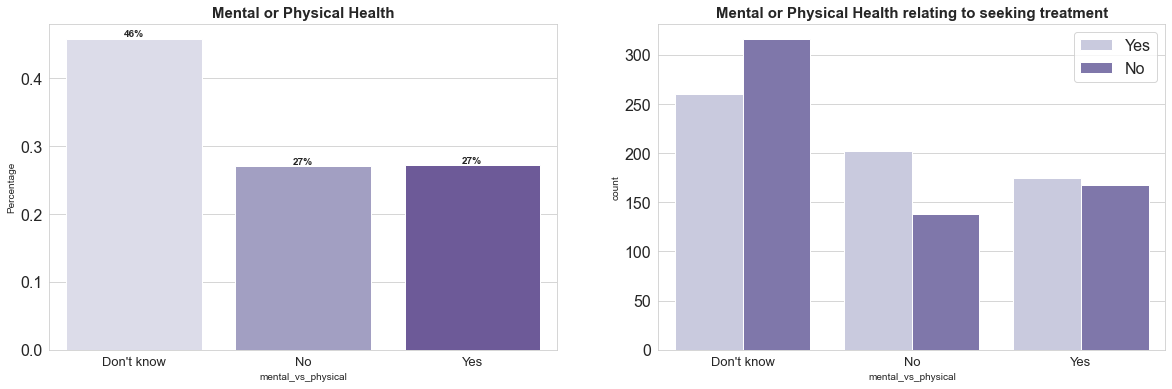

In [28]:
graph(df['mental_vs_physical'], 'Mental or Physical Health')

This is the result of responds to question: **"Do you feel that your employer takes mental health as seriously as physical health?"**

While close to 50% of people said that they didn't know, the number of people who answered Yes as well as No were completely equal and the majority of them are seeking treatments.

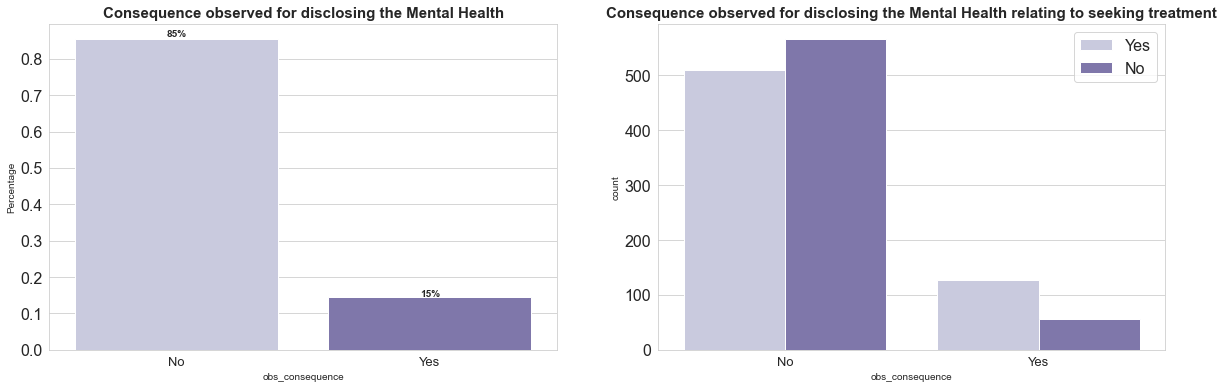

In [29]:
graph(df['obs_consequence'], 'Consequence observed for disclosing the Mental Health')

This is the result of responds to question: **"Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?"**

Majority of respondents (88%) answer 'No' to this question. I believe this is not because mental health has to affect their work but the tech industry is an organized sector and has strict guidelines. Therefore, they do not be influenced heavily by their mental health problems. 